# DSCI 235 Final Project: Missing Migrants Project

GitHub: https://github.com/jilliancook/Missing-Migrants-Project.git

The Missing Migrants Project was started in 2013 by the International Organization for Migration (IOM) and continues to track the deaths of migrants who have gone missing along their journey. Now a source of advocacy, the Missing Migrants Project aims to bring awareness to the migrant struggle. 

I am currently in a seminar class that focuses on refugees and migrants, and I've been learning about the complex and interdisciplinary nature of various refugee crises. This project will be an extension of a topic to which I have become very exposed, and I hope my analysis will shed light on the subject. 


## Part 1: Reading in and cleaning data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
working_directory = os.getcwd()
path = working_directory + '/Missing_Migrants.csv'

data = pd.read_csv(path)
data.head()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,52673,Mediterranean,"December 30, 2019",2019,Dec,1.0,NaN,1,11.0,NaN,NaN,NaN,Hypothermia,Unspecififed location off the coast of Algeria,El Watan,"35.568972356329, -1.289773129748",Western Mediterranean,https://bit.ly/2FqQHo4,Uncategorized,1
1,52666,Mediterranean,"December 30, 2019",2019,Dec,1.0,NaN,1,NaN,NaN,1.0,NaN,Presumed drowning,"Recoverd on Calamorcarro Beach, Ceuta",El Foro de Ceuta,"35.912383552874, -5.357673338898",Western Mediterranean,https://bit.ly/39yKRyF,Uncategorized,1
2,52663,East Asia,"December 27, 2019",2019,Dec,5.0,NaN,5,NaN,NaN,3.0,NaN,Unknown,"Bodies found on boat near Sado Island, Niigata...","Japan Times, Kyodo News, AFP","38.154018233313, 138.086032653130",NaN,"http://bit.ly/2sCnBz1, http://bit.ly/2sEra83, ...",Eastern Asia,3
3,52662,Middle East,"December 26, 2019",2019,Dec,7.0,NaN,7,64.0,NaN,NaN,NaN,Drowning,"Van lake near Adilcevaz, Bitlis, Turkey","EFE, BBC, ARYnews","38.777228612085, 42.739257582031",NaN,"http://bit.ly/2ZG2Y19, http://bit.ly/2MLamDf, ...",Western Asia,3
4,52661,Middle East,"December 24, 2019",2019,Dec,12.0,NaN,12,NaN,NaN,NaN,NaN,Air strike,"Al-Raqw market in Saada, Yemen","UN Humanitarian Coordinator in Yemen, Qatar Tr...","17.245364805636, 43.239093360326",NaN,"http://bit.ly/2FjolvD, http://bit.ly/2sD42GR, ...",Western Asia,4


I am not concerned with certain columns in this data set, so I'm going to drop those that aren't relevant to my analysis. I am also going to fill all numerical NaN values with 0.

In [3]:
df = data.drop(['Reported Date', 'Web ID', 'Information Source', 'URL', 'Source Quality', 'Location Coordinates'], axis=1)
df[["Number Dead","Minimum Estimated Number of Missing","Total Dead and Missing","Number of Survivors","Number of Females","Number of Males","Number of Children"]] = df[["Number Dead","Minimum Estimated Number of Missing","Total Dead and Missing","Number of Survivors","Number of Females","Number of Males","Number of Children"]].fillna(0)
df.head()

,Region of Incident,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Migration Route,UNSD Geographical Grouping
0,Mediterranean,2019,Dec,1.0,0.0,1,11.0,0.0,0.0,0.0,Hypothermia,Unspecififed location off the coast of Algeria,Western Mediterranean,Uncategorized
1,Mediterranean,2019,Dec,1.0,0.0,1,0.0,0.0,1.0,0.0,Presumed drowning,"Recoverd on Calamorcarro Beach, Ceuta",Western Mediterranean,Uncategorized
2,East Asia,2019,Dec,5.0,0.0,5,0.0,0.0,3.0,0.0,Unknown,"Bodies found on boat near Sado Island, Niigata...",NaN,Eastern Asia
3,Middle East,2019,Dec,7.0,0.0,7,64.0,0.0,0.0,0.0,Drowning,"Van lake near Adilcevaz, Bitlis, Turkey",NaN,Western Asia
4,Middle East,2019,Dec,12.0,0.0,12,0.0,0.0,0.0,0.0,Air strike,"Al-Raqw market in Saada, Yemen",NaN,Western Asia


The data now includes the following columns:

* **Region of Incident**: Region in which incident took place
* **Reported Year/Month**: Estimated Year/Month in which incident took place
* **Number Dead**: Total number of people confirmed dead, marked by the number of bodies recovered
* **Minimum Estimated Number of Missing**: Estimated number of those who are missing, and therefore also presumed dead
* **Total Dead and Missing**: Sum of 'Number Dead' and 'Minimum Estimated Number of Missing' columns
* **Number of Survivors**: Number of surviving migrants
* **Number of Females/Males/Children**: Number of females/males/children (under 18) found dead or missing
* **Cause of Death**: Conditions that resulted in migrant death
* **Location Description**: Place where death occured or where bodies were found
* **Migration Route**: Name of migration route where incident occured
* **UNSD Geographical Grouping**: Region where incident took place, as described by the United Nations Statistics Division 

## Part 2: Location, time of year, causes of death

In this first part of my analysis, I will be concerned with the regions and locales where these incidents occured, the time of year they occured, and what were the principal causes of death in hopes to find any patterns or relations.

#### Routes with highest incidents

* Which migration routes have the highest number of migrant deaths, both number dead and total dead and missing?

In [84]:
deaths = df.groupby('Migration Route')['Number Dead'].sum().sort_values(ascending = False)
print(deaths[0:3])

deaths_and_missing = df.groupby('Migration Route')['Total Dead and Missing'].sum().sort_values(ascending = False)
print()
print(deaths_and_missing[0:3])

Migration Route
Central Mediterranean    4688.0
Central America to US    2606.0
Eastern Mediterranean    1132.0
Name: Number Dead, dtype: float64

Migration Route
Central Mediterranean    15764
Central America to US     2632
Western Mediterranean     1798
Name: Total Dead and Missing, dtype: int64


Here we can see that the top three routes for both number of deaths are the Central Mediterranean, Central American to US, and Eastern Mediterranean. The Mediterannean is a highly intersected region, where refugees fleeing from the Middle East, Eastern Europe, and those traveling North through Africa will converge in an attempt to make it to Central and Western Europe. This is a traffic-dense area, which explains the large number of missing and dead migrants. The Central America to US is another migrant-dense route, where refugees fleeing threats such as gang violence, political corruption, and religious persecution will travel North in hopes of making it to the US. And even if a refugee gets to the US border, there is still a harsh conflict line that leaves many dead and missing in their attempt to make it into the US in the final stages of their journey. 

We can also analyze the spread between those found dead and the total dead and missing, which should equal the "Minimum Estimated Number of Missing" column.

In [94]:
missing = (deaths_and_missing - deaths).sort_values(ascending=False)
print(missing)
print()
print(df.groupby('Migration Route')['Minimum Estimated Number of Missing'].sum().sort_values(ascending=False) == missing)

Migration Route
Central Mediterranean                        11076.0
Western Mediterranean                         1163.0
Eastern Mediterranean                          471.0
Western African                                217.0
Horn Africa to Yemen                           104.0
Central America to US                           26.0
Caribbean to Central America                    20.0
Dominican Republic to Puerto Rico                8.0
Western Balkans                                  8.0
Darien Gap                                       6.0
Malaysia to Indonesia                            6.0
Calais to United Kingdom                         0.0
From Haiti to Dajabon, Dominican Republic        0.0
Italy to France                                  0.0
Venezuela to Curaçao                             0.0
dtype: float64

Migration Route
Central Mediterranean                        True
Western Mediterranean                        True
Eastern Mediterranean                        True
Western

The number of missing migrants resembles the patterns of the total number of missing and dead migrants, with most incidents occuring in the mediterranean region. It is also confirmed by the boolean expression that the "by-hand" calculation of the number of missing migrants equals the "Minimum Estimated Number of Missing" column.

#### Time of year with highest incidents

* Which time of year are migrant incidents at their highest? 

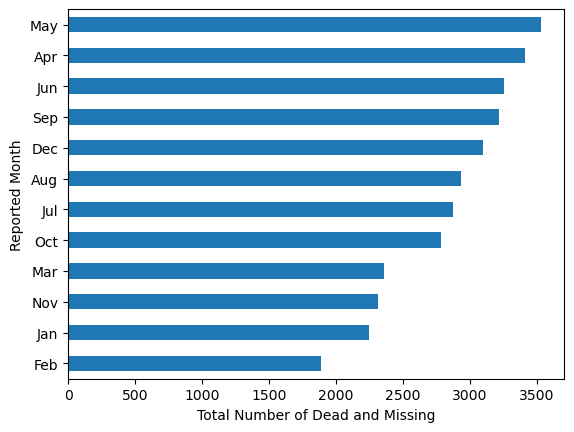

In [82]:
time_of_year = df.groupby('Reported Month')['Total Dead and Missing'].sum().sort_values()
time_of_year.plot(kind='barh')
plt.xlabel("Total Number of Dead and Missing")
plt.show()

The time of year does not indicate many significant correlations. The one pattern I do notice, however, is that the highest number of incidents occur May and June, nearing the summer months, which perhaps is a result of the higher temperatures during this time of year. However, I acknowledge that this correlation is not strong. 

#### Principle causes of death
* What are the leading causes of death among migrants?

In [81]:
causes = df.groupby('Cause of Death')['Total Dead and Missing'].sum().sort_values(ascending = False)
print(causes)

Cause of Death
Drowning                                              17707
Presumed drowning                                      3656
Sickness and lack of access to medicines               1852
Unknown                                                1698
Vehicle Accident                                       1423
                                                      ...  
Killed by hippopotamus                                    1
Starvation, Excessive Physical Abuse, Sexual abuse        1
Killed by hippoptamus                                     1
Killed by mortar shell                                    1
Presumed vehicle accident                                 1
Name: Total Dead and Missing, Length: 266, dtype: int64


The leading causes of incidents are drowning and sickess/lack of access to medicines. Since the largest number of incidents occur along the Mediterannean routes where traversing water is a large portion of the journey, it would be consistent that the leading cause of death is drowning. Certain diseases and sicknesses also often strike, especially over longer journeys lasting multiple months, and can become fatal for those with little access to standardized medical care. 

## Part 3: Gender, age, and survivors

In the last part of my analysis, I'll be looking at how incidents differ between men, women, and children. I also be looking into the percentage, if any, of groups that survived. 

#### Gender and age differences
* How do the number of incidents compare between men, women, and children?

In [68]:
gender = df.groupby('Reported Year')['Number of Males', 'Number of Females', 'Number of Children'].aggregate('sum')
print(gender)
print()
print(gender['Number of Males'].sum())
print(gender['Number of Females'].sum())
print(gender['Number of Children'].sum())

               Number of Males  Number of Females  Number of Children
Reported Year                                                        
2014                     202.0               54.0               300.0
2015                     797.0              216.0               291.0
2016                     890.0              282.0               268.0
2017                    1614.0              546.0               308.0
2018                    1715.0              655.0               397.0
2019                     838.0              347.0               203.0

6056.0
2100.0
1767.0


/var/folders/qv/mt96nc3121j_wrxm12y_xww40000gn/T/ipykernel_63054/1623565230.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gender = df.groupby('Reported Year')['Number of Males', 'Number of Females', 'Number of Children'].aggregate('sum')


Here we can see that men have the highest incident rate, followed by women and then by children. The first data frame indicates the number of incidents in each year separated by males, females, and children, while the latter three numbers represent the total sum of incidents for each male, female, and children grouping for all six years. 

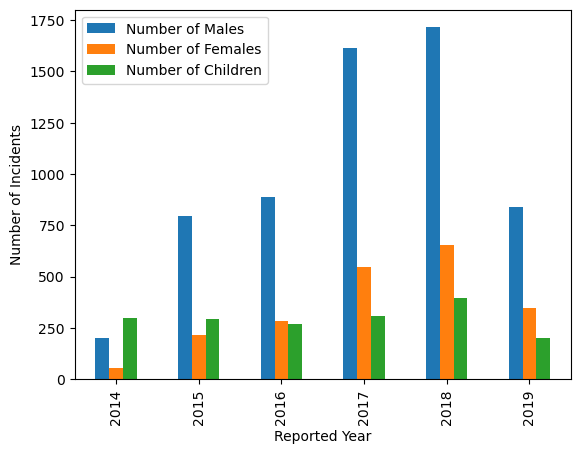

In [69]:
gender.plot.bar()
plt.ylabel("Number of Incidents")
plt.show()

Visually, we can again see that incidents are most often highest among males, followed by females and children.  

#### Survival rates
* What is the survival rate by year from this data? What is the average survival rate across all years?

In [116]:
survivors = df.groupby('Reported Year')['Number of Survivors', 'Total Dead and Missing'].sum()
survivors['Survival Rate'] = survivors['Number of Survivors'] / (survivors['Total Dead and Missing'] + survivors['Number of Survivors']) * 100

print(survivors)
print()
print(survivors['Survival Rate'].mean())

               Number of Survivors  Total Dead and Missing  Survival Rate
Reported Year                                                            
2014                        5553.0                    5287      51.226937
2015                        8115.0                    6584      55.207837
2016                       17407.0                    8070      68.324371
2017                        6424.0                    6279      50.570731
2018                        9167.0                    4734      65.944896
2019                        4744.0                    2958      61.594391

58.81152732995298


/var/folders/qv/mt96nc3121j_wrxm12y_xww40000gn/T/ipykernel_63054/2085049101.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  survivors = df.groupby('Reported Year')['Number of Survivors', 'Total Dead and Missing'].sum()


I find this to be one of the most eye-opening segments from this analysis. The average survival rate across all years is just under 60%. An estimated 40% of migrants who set out on their journey, according to this data, will be presumed dead or missing. Not only does this show the danger of these migrations, but also the desperation that many migrants are facing if they are willing to take a chance on surviving knowing that there is a strong likelihood they will not.

## Part 4: Conclusion and acknowledgements

Through this analysis, I have attempted to find relationships between migration routes, time of year, gender, and the number of dead, missing, and surviving migrants. While I provided a comprehensive analysis, I also want to acknowledge that neither this exploration nor this data set are perfect. As seen by the number of NaN values, which were eventually replaced by zeroes, there is a significant amount of missing data which weakens any argument. However, I hope that even with these faults, my examination of this data set provides a glimpse into the migrant struggle. 